In [39]:
#### https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#### https://colab.research.google.com/github/rpi-techfundamentals/website_spring_2020/blob/master/content/notebooks/20-deep-learning1/06-regression-bh-pytorch.ipynb#scrollTo=n4QTTcBF3aeZ
### https://blog.csdn.net/qq_33373858/article/details/88108153

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [40]:
## data
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'])

boston_df.columns = boston['feature_names']
boston_df['PRICE']= boston['target']
print(boston_df.shape)

boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
## missing value
np.isnan(boston_df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

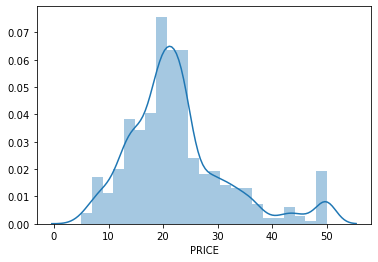

In [42]:
sns.distplot(boston_df['PRICE'])

In [43]:
## train test split
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [101]:
### MLP model
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.nn.functional as F


## train hyperprameters
batch_size = 200
num_epochs = 1500
learning_rate = 0.01

batch_no = len(X_train) // batch_size  # batches
n_input = X_train.shape[1] # Number of columns in input matrix
n_output = 1

In [102]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, n_output):
        super(MLP, self).__init__()
        self.linear = nn.Sequential(
        nn.Linear(input_size, 200),
        nn.ReLU(inplace=True),
#         nn.Linear(200, 150),
#         nn.ReLU(inplace=True),
#         nn.Linear(150, 100),
#         nn.ReLU(inplace=True),
        nn.Linear(200, n_output)
        )
 
    def forward(self, x):
        out = self.linear(x)
        return out
    
    
mlp = MLP(n_input, n_output)

In [103]:
## optimizer
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

## mean squared loss
# criterion = torch.nn.MSELoss(size_average=False)  
criterion = torch.nn.MSELoss(size_average=True)  

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [104]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):

    X_train, y_train = shuffle(X_train, y_train)

    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        
        optimizer.zero_grad()  # zero the parameter gradients

        outputs = mlp(inputs)
        #print("outputs",outputs)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  8074.026519775391
Epoch 2 loss:  2466.4533081054688
Epoch 3 loss:  6444.7646484375
Epoch 4 loss:  680.1906127929688
Epoch 5 loss:  2761.785400390625
Epoch 6 loss:  2145.8324584960938
Epoch 7 loss:  252.81946563720703
Epoch 8 loss:  1196.1783447265625
Epoch 9 loss:  1337.6430053710938
Epoch 10 loss:  311.9265441894531
Epoch 11 loss:  360.5279006958008
Epoch 12 loss:  759.6557312011719
Epoch 13 loss:  432.30882263183594
Epoch 14 loss:  140.73829650878906
Epoch 15 loss:  337.2449951171875
Epoch 16 loss:  395.3411865234375
Epoch 17 loss:  186.8744010925293
Epoch 18 loss:  150.16978073120117
Epoch 19 loss:  252.35911560058594
Epoch 20 loss:  206.06340789794922
Epoch 21 loss:  122.15956497192383
Epoch 22 loss:  156.74818420410156
Epoch 23 loss:  181.2992401123047
Epoch 24 loss:  131.79022216796875
Epoch 25 loss:  112.49905395507812
Epoch 26 loss:  140.93517303466797
Epoch 27 loss:  129.11845016479492
Epoch 28 loss:  111.71542358398438
Epoch 29 loss:  122.73859024047852
Epoch 3

Epoch 254 loss:  49.866594314575195
Epoch 255 loss:  49.38623237609863
Epoch 256 loss:  48.9884090423584
Epoch 257 loss:  48.9770393371582
Epoch 258 loss:  48.59794998168945
Epoch 259 loss:  49.09132957458496
Epoch 260 loss:  49.16757774353027
Epoch 261 loss:  48.03510284423828
Epoch 262 loss:  49.27058219909668
Epoch 263 loss:  48.54939842224121
Epoch 264 loss:  48.93695259094238
Epoch 265 loss:  48.742136001586914
Epoch 266 loss:  48.87486267089844
Epoch 267 loss:  50.48836135864258
Epoch 268 loss:  48.0608024597168
Epoch 269 loss:  49.22205924987793
Epoch 270 loss:  48.920541763305664
Epoch 271 loss:  48.149824142456055
Epoch 272 loss:  46.836002349853516
Epoch 273 loss:  48.233041763305664
Epoch 274 loss:  48.16518974304199
Epoch 275 loss:  46.922712326049805
Epoch 276 loss:  47.943037033081055
Epoch 277 loss:  46.86688232421875
Epoch 278 loss:  48.02328681945801
Epoch 279 loss:  47.556264877319336
Epoch 280 loss:  47.40011024475098
Epoch 281 loss:  48.45388984680176
Epoch 282 loss

Epoch 552 loss:  34.803500175476074
Epoch 553 loss:  33.58499240875244
Epoch 554 loss:  30.17219829559326
Epoch 555 loss:  30.470519065856934
Epoch 556 loss:  29.915411949157715
Epoch 557 loss:  30.175140380859375
Epoch 558 loss:  31.158676147460938
Epoch 559 loss:  25.89599609375
Epoch 560 loss:  26.42603302001953
Epoch 561 loss:  29.50492000579834
Epoch 562 loss:  26.470741271972656
Epoch 563 loss:  26.175308227539062
Epoch 564 loss:  27.24155902862549
Epoch 565 loss:  25.09459686279297
Epoch 566 loss:  26.438624382019043
Epoch 567 loss:  26.184661865234375
Epoch 568 loss:  26.4385404586792
Epoch 569 loss:  25.181121826171875
Epoch 570 loss:  26.168825149536133
Epoch 571 loss:  25.657299041748047
Epoch 572 loss:  25.771601676940918
Epoch 573 loss:  25.641746520996094
Epoch 574 loss:  25.24919891357422
Epoch 575 loss:  24.85295295715332
Epoch 576 loss:  25.450570106506348
Epoch 577 loss:  25.981667518615723
Epoch 578 loss:  25.643918991088867
Epoch 579 loss:  24.844428062438965
Epoch 

Epoch 795 loss:  19.90670871734619
Epoch 796 loss:  18.94556951522827
Epoch 797 loss:  17.921659469604492
Epoch 798 loss:  18.6474552154541
Epoch 799 loss:  21.74246597290039
Epoch 800 loss:  21.038382530212402
Epoch 801 loss:  20.80521011352539
Epoch 802 loss:  21.5593900680542
Epoch 803 loss:  17.77025318145752
Epoch 804 loss:  17.695673942565918
Epoch 805 loss:  18.020721912384033
Epoch 806 loss:  17.61164426803589
Epoch 807 loss:  17.89666748046875
Epoch 808 loss:  19.014075756072998
Epoch 809 loss:  17.587507247924805
Epoch 810 loss:  23.507190704345703
Epoch 811 loss:  19.44715166091919
Epoch 812 loss:  18.661224842071533
Epoch 813 loss:  18.911100387573242
Epoch 814 loss:  16.87053871154785
Epoch 815 loss:  19.232277870178223
Epoch 816 loss:  22.149697303771973
Epoch 817 loss:  17.337093830108643
Epoch 818 loss:  18.487879276275635
Epoch 819 loss:  19.52700901031494
Epoch 820 loss:  18.057390213012695
Epoch 821 loss:  16.570466995239258
Epoch 822 loss:  17.25748348236084
Epoch 8

Epoch 1055 loss:  15.458598136901855
Epoch 1056 loss:  14.021067142486572
Epoch 1057 loss:  14.980230808258057
Epoch 1058 loss:  13.111966609954834
Epoch 1059 loss:  14.229526042938232
Epoch 1060 loss:  13.4944167137146
Epoch 1061 loss:  13.677814960479736
Epoch 1062 loss:  13.330452919006348
Epoch 1063 loss:  14.11660623550415
Epoch 1064 loss:  14.411136627197266
Epoch 1065 loss:  12.902218341827393
Epoch 1066 loss:  15.351916790008545
Epoch 1067 loss:  14.7597336769104
Epoch 1068 loss:  16.095358848571777
Epoch 1069 loss:  13.777872085571289
Epoch 1070 loss:  12.934142112731934
Epoch 1071 loss:  13.003608703613281
Epoch 1072 loss:  13.840084075927734
Epoch 1073 loss:  15.299869060516357
Epoch 1074 loss:  17.89827823638916
Epoch 1075 loss:  14.696615219116211
Epoch 1076 loss:  12.95339584350586
Epoch 1077 loss:  14.61945390701294
Epoch 1078 loss:  13.893662452697754
Epoch 1079 loss:  13.767139911651611
Epoch 1080 loss:  13.64528512954712
Epoch 1081 loss:  14.931554317474365
Epoch 1082

Epoch 1305 loss:  11.430789947509766
Epoch 1306 loss:  11.770494937896729
Epoch 1307 loss:  17.227583408355713
Epoch 1308 loss:  13.283628463745117
Epoch 1309 loss:  13.572015762329102
Epoch 1310 loss:  14.82126522064209
Epoch 1311 loss:  20.974175453186035
Epoch 1312 loss:  15.596734523773193
Epoch 1313 loss:  14.132283210754395
Epoch 1314 loss:  14.86620283126831
Epoch 1315 loss:  14.506257057189941
Epoch 1316 loss:  14.54788064956665
Epoch 1317 loss:  15.899881362915039
Epoch 1318 loss:  18.64126205444336
Epoch 1319 loss:  24.85856533050537
Epoch 1320 loss:  16.856741905212402
Epoch 1321 loss:  21.265923023223877
Epoch 1322 loss:  16.80961561203003
Epoch 1323 loss:  14.85499382019043
Epoch 1324 loss:  15.593190670013428
Epoch 1325 loss:  11.614284992218018
Epoch 1326 loss:  11.562891483306885
Epoch 1327 loss:  11.640735149383545
Epoch 1328 loss:  12.522757530212402
Epoch 1329 loss:  20.2211275100708
Epoch 1330 loss:  13.649842739105225
Epoch 1331 loss:  15.485568046569824
Epoch 1332

In [105]:
## evaluation
from sklearn.metrics import mean_squared_error


X = Variable(torch.FloatTensor(X_train)) 
result = mlp(X)
pred=result.data[:,0].numpy()
print('train MSE: ', mean_squared_error(pred,y_train))


train MSE:  5.0501796335853015


In [106]:
X = Variable(torch.FloatTensor(X_test)) 
result = mlp(X)
pred=result.data[:,0].numpy()
print('test MSE: ', mean_squared_error(pred,y_test))


test MSE:  22.470229101240086
